# Predicting women shoe price

## 1. Problem Statement - 
The objective here is to predict the min and max price of women shoes.


In [1]:
#Step 1 - Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [6]:
#Step 2 - Loading the dataset
dataset = pd.read_csv('data.csv', low_memory=False)

In [7]:
print dataset.shape

(33801, 52)


So, we have 52 features and 33k rows. Since our objective is to determine price of shoes, we'll only select relevant features.

## 2. Hypothesis Generation

After doing Chi-Squared tests, these are the columns that seem Statistically significant to our target feature 
1. id
2. brand
3. categories
4. colors
5. name
6. prices.amountMin
7. prices.amountMax
8. prices.condition
9. prices.currency
10. prices.isSale
11. prices.offer
12. prices.returnPolicy
13. prices.shippingFree
14. prices.size

## Exploratory Data Analysis

In [142]:
#geneating a new feature called "prices.amountAverage"

In [130]:
columns = ['brand', 'prices.amountMin', 'prices.amountMax', 'prices.isSale', 'prices.currency']

In [132]:
shoes = dataset[columns]
shoes.dropna(inplace=True)
shoes['prices.amountAverage'] = (shoes['prices.amountMin'] + shoes['prices.amountMax']) / 2

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
# Transform different currency to USD
for row in shoes.itertuples():
    if row._5 == 'CAD':
        shoes['prices.amountMin'][row.Index] *= 0.73
        shoes['prices.amountMax'][row.Index] *= 0.73
        shoes['prices.amountAverage'][row.Index] *= 0.73
    elif row._5 == 'EUR':
        shoes['prices.amountMin'][row.Index] *= 1.1
        shoes['prices.amountMax'][row.Index] *= 1.1
        shoes['prices.amountAverage'][row.Index] *= 1.1
    elif row._5 == 'AUD':
        shoes['prices.amountMin'][row.Index] *= 0.75
        shoes['prices.amountMax'][row.Index] *= 0.75
        shoes['prices.amountAverage'][row.Index] *= 0.75
    elif row._5 == 'GPB':
        shoes['prices.amountMin'][row.Index] *= 1.3
        shoes['prices.amountMax'][row.Index] *= 1.3
        shoes['prices.amountAverage'][row.Index] *= 1.3

c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A

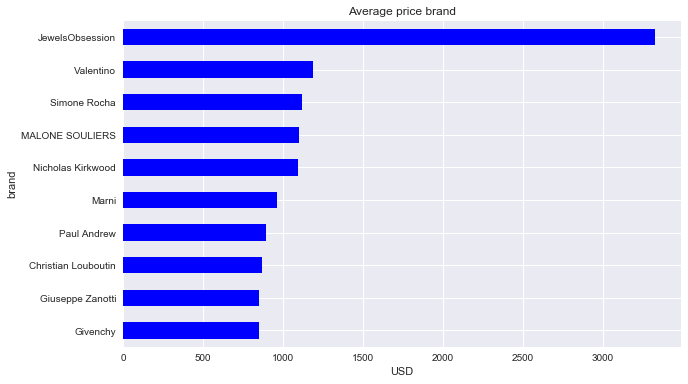

In [143]:
data = shoes.groupby('brand')['prices.amountAverage'].mean().sort_values(ascending=False).head(10)
ax = data.plot(kind='barh', figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('USD')
plt.title('Average price brand')

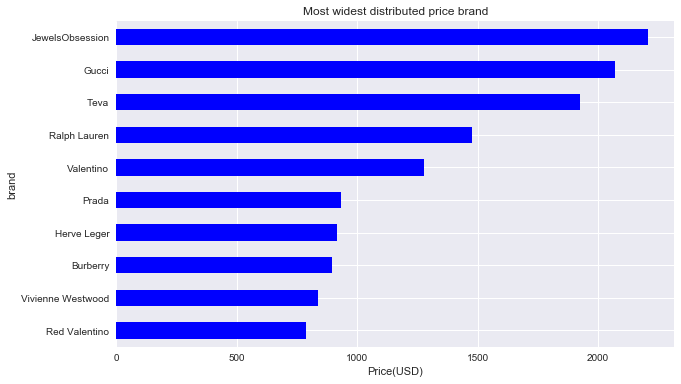

In [136]:
grouped = shoes.groupby('brand')['prices.amountAverage']
data = grouped.apply(lambda x:x.max() - x.min()).sort_values(ascending=False).head(10)
ax = data.plot(kind='barh', figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('Price(USD)')
plt.title('Most widest distributed price brand')

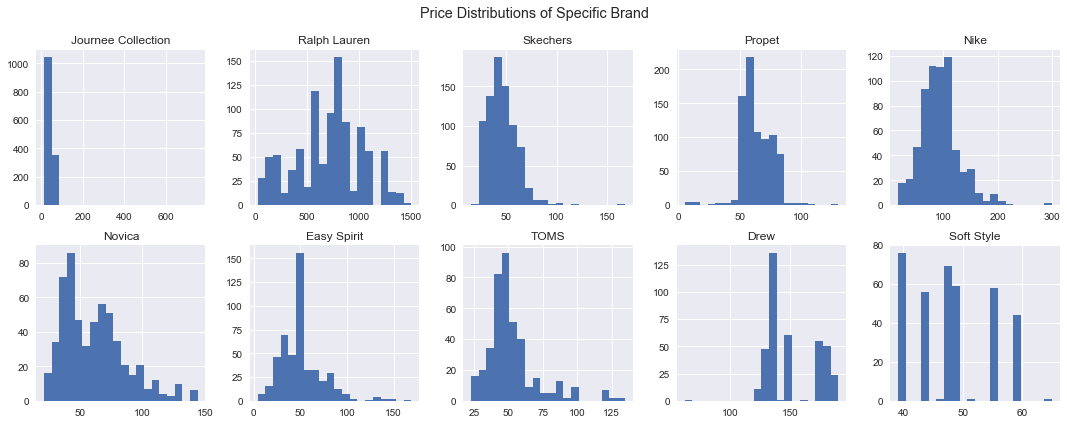

In [137]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for idx, brand in enumerate(shoes['brand'].value_counts()[0:10].index):
    axs[idx//5, idx%5].hist(shoes[shoes['brand'] == brand]['prices.amountAverage'], bins=20)
    axs[idx//5, idx%5].set_title(brand)
plt.suptitle('Price Distributions of Specific Brand')
plt.tight_layout()
fig.subplots_adjust(top=0.88)

## 3. Data Cleaning

Now, a Train and Test file is generated with above said features in 80:20 

In [125]:
#Loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [84]:
#Combining

train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print train.shape, test.shape, data.shape

(26252, 14) (6564, 14) (32816, 14)


In [85]:
data.apply(lambda x: sum(x.isnull()))

id                         0
brand                      0
categories                 0
colors                 13576
name                       0
prices.amountMin           0
prices.amountMax           0
prices.condition       21781
prices.currency            0
prices.isSale              0
prices.offer               0
prices.returnPolicy    31442
prices.shippingFree    29853
source                     0
dtype: int64

In [86]:
data.dtypes

id                      object
brand                   object
categories              object
colors                  object
name                    object
prices.amountMin       float64
prices.amountMax       float64
prices.condition        object
prices.currency         object
prices.isSale             bool
prices.offer            object
prices.returnPolicy     object
prices.shippingFree     object
source                  object
dtype: object

In [53]:
data.head()

,id,brand,categories,colors,name,prices.amountMin,prices.amountMax,prices.condition,prices.currency,prices.isSale,prices.offer,prices.returnPolicy,prices.shippingFree
0,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,USD,False,No,NaN,Yes
1,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,USD,False,No,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,USD,False,No,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,USD,False,No,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,USD,True,No,NaN,NaN


In [87]:
data.describe()

,prices.amountMin,prices.amountMax,prices.isSale
count,32816.000000,32816.000000,32816
mean,87.272877,88.377921,0.181893
std,146.210344,148.453794,0.385762
min,0.010000,0.010000,False
25%,33.590000,33.990000,0
50%,51.960000,51.990000,0
75%,87.960000,89.000000,0
max,4198.990000,4198.990000,True


In [88]:
data.apply(lambda x: len(x.unique()))

id                     9112
brand                  1360
categories              875
colors                 1827
name                   8856
prices.amountMin       3388
prices.amountMax       3244
prices.condition         11
prices.currency           1
prices.isSale             2
prices.offer              2
prices.returnPolicy       8
prices.shippingFree       3
source                    2
dtype: int64

Differentiating Continous and Categorical Variables

In [89]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID col:
categorical_columns = [x for x in categorical_columns if x not in ['id','source']]
#Print frequency of categories
for col in categorical_columns:
    print '\nFrequency of Categories for varible %s'%col
    print data[col].value_counts()


Frequency of Categories for varible brand
Journee Collection                1400
Ralph Lauren                       991
Skechers                           799
Propet                             796
Nike                               649
Novica                             574
Easy Spirit                        487
TOMS                               408
Drew                               387
Soft Style                         365
Rose Petals by Walking Cradles     359
Aerosoles                          356
Naturalizer                        354
In-Sattva                          332
David Tate                         330
Nine West                          328
SoftWalk                           317
Nature Breeze                      301
Dyeables                           301
Trotters                           277
Pleaser                            273
Lugz                               265
Touch Ups                          262
Hadari                             258
Nina                 

This part ends our basic exploration of data. Lets start with data cleaning.

## 3.1 Missing Value Treatment

In [90]:
data.apply(lambda x: sum(x.isnull()))

id                         0
brand                      0
categories                 0
colors                 13576
name                       0
prices.amountMin           0
prices.amountMax           0
prices.condition       21781
prices.currency            0
prices.isSale              0
prices.offer               0
prices.returnPolicy    31442
prices.shippingFree    29853
source                     0
dtype: int64

It can be noted that all the missing value variables are categorical in nature
So we need to perform mode imputation on it


In [91]:
#Load libs
from scipy.stats import mode

In [92]:
#Let us first deal with -- Color Variable -- 
data.colors.value_counts().head()

Black     2907
Brown      962
White      680
Blue       604
Silver     383
Name: colors, dtype: int64

In [98]:
#Determing the mode for each
color_mode = data.pivot_table(values='colors', columns='id',aggfunc=(lambda x:mode(x).mode[0]) )
print 'Mode for each color:'
print color_mode
#Get a boolean variable specifying missing values
miss_bool = data['colors'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool)
data.loc[miss_bool,'colors'] = data.loc[miss_bool,'id'].apply(lambda x: color_mode[x])
print sum(data['colors'].isnull())

Mode for each color:
id
AVpe--5gLJeJML43zzQk                                     Brown
AVpe--8X1cnluZ0-bU1d              Black,Driftwood,Gray,Marsala
AVpe--oTilAPnD_xSXfv                                      Gold
AVpe--qs1cnluZ0-bUuE                                     Black
AVpe-0Aq1cnluZ0-bQ3U                                      Blue
AVpe-0F4LJeJML43zvWi                 Black,Turquoise,Pink,Navy
AVpe-0U9ilAPnD_xSTyK                                     Black
AVpe-16y1cnluZ0-bRin                           Champagne,Black
AVpe-1Q21cnluZ0-bRT8                                     Black
AVpe-2AiLJeJML43zwCU                                         0
AVpe-30jLJeJML43zwsb                             Brown,Luggage
AVpe-3J9LJeJML43zwda                                         0
AVpe-3a21cnluZ0-bSGT                                      Pink
AVpe-4D5ilAPnD_xSVH2                                         0
AVpe-4QcLJeJML43zw3m                                     Black
AVpe-53mLJeJML43zxYV     Blue,N

In [99]:
data.apply(lambda x: sum(x.isnull()))

id                     0
brand                  0
categories             0
colors                 0
name                   0
prices.amountMin       0
prices.amountMax       0
prices.condition       0
prices.currency        0
prices.isSale          0
prices.offer           0
prices.returnPolicy    0
prices.shippingFree    0
source                 0
dtype: int64

Now let us impute the "condition variable"

In [94]:
#Determing the mode for each
condition_mode = data.pivot_table(values='prices.condition', columns='id',aggfunc=(lambda x:mode(x).mode[0]) )
print 'Mode for each condition:'
print condition_mode
#Get a boolean variable specifying missing values
miss_bool2 = data['prices.condition'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool2)
data.loc[miss_bool2,'prices.condition'] = data.loc[miss_bool2,'id'].apply(lambda x: color_mode[x])
print sum(data['prices.condition'].isnull())

Mode for each condition:
id
AVpe--5gLJeJML43zzQk             new
AVpe--8X1cnluZ0-bU1d             new
AVpe--oTilAPnD_xSXfv       Pre-owned
AVpe--qs1cnluZ0-bUuE       Pre-owned
AVpe-0Aq1cnluZ0-bQ3U       Pre-owned
AVpe-0F4LJeJML43zvWi             New
AVpe-0U9ilAPnD_xSTyK               0
AVpe-16y1cnluZ0-bRin               0
AVpe-1Q21cnluZ0-bRT8             new
AVpe-2AiLJeJML43zwCU             new
AVpe-30jLJeJML43zwsb             new
AVpe-3J9LJeJML43zwda             new
AVpe-3a21cnluZ0-bSGT             new
AVpe-4D5ilAPnD_xSVH2             new
AVpe-4QcLJeJML43zw3m             new
AVpe-53mLJeJML43zxYV             new
AVpe-65aLJeJML43zxxk             new
AVpe-6d3ilAPnD_xSV9A             new
AVpe-6fxLJeJML43zxnv             new
AVpe-6wSLJeJML43zxtp               0
AVpe-6zL1cnluZ0-bTTI             new
AVpe-9xcLJeJML43zy1V             new
AVpe-As0ilAPnD_xSBcX             new
AVpe-AxrilAPnD_xSBdt             new
AVpe-CttilAPnD_xSCLa             new
AVpe-D2pLJeJML43zeSa               0
AVpe-DStLJ

Note: For prices.offer, inorder to simplify, I have transformed this feature with two classes  "Yes" or "No"

Next, lets deal with prices.returnPolicy 

In [95]:
#Determing the mode for each
return_mode = data.pivot_table(values='prices.returnPolicy', columns='id',aggfunc=(lambda x:mode(x).mode[0]) )
print 'Mode for each returnPolicy:'
print return_mode
#Get a boolean variable specifying missing values
miss_bool2 = data['prices.returnPolicy'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool2)
data.loc[miss_bool2,'prices.returnPolicy'] = data.loc[miss_bool2,'id'].apply(lambda x: color_mode[x])
print sum(data['prices.returnPolicy'].isnull())

Mode for each returnPolicy:
id
AVpe--5gLJeJML43zzQk                                                    0
AVpe--8X1cnluZ0-bU1d                                                    0
AVpe--oTilAPnD_xSXfv                                                    0
AVpe--qs1cnluZ0-bUuE                                                    0
AVpe-0Aq1cnluZ0-bQ3U                                                    0
AVpe-0F4LJeJML43zvWi    The full amount will be credited to the origin...
AVpe-0U9ilAPnD_xSTyK                                                    0
AVpe-16y1cnluZ0-bRin                                                    0
AVpe-1Q21cnluZ0-bRT8                                                    0
AVpe-2AiLJeJML43zwCU                                                    0
AVpe-30jLJeJML43zwsb                                                    0
AVpe-3J9LJeJML43zwda                                                    0
AVpe-3a21cnluZ0-bSGT                                                    0
AVpe-4D

Next feature is prices.shipping 

I converted it to prices.shippingFree that shows if the shipping is "free" or "not". Imputing values now.

In [96]:
#Determing the mode for each
shipping_mode = data.pivot_table(values='prices.shippingFree', columns='id',aggfunc=(lambda x:mode(x).mode[0]) )
print 'Mode for each shippingFree:'
print shipping_mode
#Get a boolean variable specifying missing values
miss_bool3 = data['prices.shippingFree'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool3)
data.loc[miss_bool3,'prices.shippingFree'] = data.loc[miss_bool3,'id'].apply(lambda x: color_mode[x])
print sum(data['prices.shippingFree'].isnull())

Mode for each shippingFree:
id
AVpe--5gLJeJML43zzQk      0
AVpe--8X1cnluZ0-bU1d      0
AVpe--oTilAPnD_xSXfv     No
AVpe--qs1cnluZ0-bUuE     No
AVpe-0Aq1cnluZ0-bQ3U     No
AVpe-0F4LJeJML43zvWi    Yes
AVpe-0U9ilAPnD_xSTyK     No
AVpe-16y1cnluZ0-bRin      0
AVpe-1Q21cnluZ0-bRT8      0
AVpe-2AiLJeJML43zwCU      0
AVpe-30jLJeJML43zwsb      0
AVpe-3J9LJeJML43zwda      0
AVpe-3a21cnluZ0-bSGT      0
AVpe-4D5ilAPnD_xSVH2      0
AVpe-4QcLJeJML43zw3m      0
AVpe-53mLJeJML43zxYV      0
AVpe-65aLJeJML43zxxk      0
AVpe-6d3ilAPnD_xSV9A      0
AVpe-6fxLJeJML43zxnv      0
AVpe-6wSLJeJML43zxtp      0
AVpe-6zL1cnluZ0-bTTI      0
AVpe-9xcLJeJML43zy1V      0
AVpe-As0ilAPnD_xSBcX      0
AVpe-AxrilAPnD_xSBdt      0
AVpe-CttilAPnD_xSCLa      0
AVpe-D2pLJeJML43zeSa      0
AVpe-DStLJeJML43zeGm      0
AVpe-EDs1cnluZ0-a_33      0
AVpe-EypLJeJML43zem1    Yes
AVpe-Ez6ilAPnD_xSC52      0
                       ... 
AVsUuz_3v8e3D1O-mExH      0
AVsUuz_Rnnc1JgDc4L0_      0
AVsUuz_Znnc1JgDc4L1A      0
AVsUuz_uv8e3D1O-m

In [100]:
data.apply(lambda x: sum(x.isnull()))

id                     0
brand                  0
categories             0
colors                 0
name                   0
prices.amountMin       0
prices.amountMax       0
prices.condition       0
prices.currency        0
prices.isSale          0
prices.offer           0
prices.returnPolicy    0
prices.shippingFree    0
source                 0
dtype: int64

That's it, now we have a clean data. 

## 4. Feature Engineering

Here, we can add, combine, modify features inorder to create a better model <br>
With regards to this dataset, price.currency is in USD, CAD, GBP, AUD <br>
I converted all the prices to USD

## 5. Modeling 

Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types.
<br> Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.


In [101]:
data.apply(lambda x: len(x.unique()))

id                     9112
brand                  1360
categories              875
colors                 1827
name                   8856
prices.amountMin       3388
prices.amountMax       3244
prices.condition        854
prices.currency           1
prices.isSale             2
prices.offer              2
prices.returnPolicy    1773
prices.shippingFree    1598
source                    2
dtype: int64

In [102]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['id','brand','categories','colors','name','prices.condition', 'prices.currency','prices.isSale','prices.offer','prices.returnPolicy','prices.shippingFree']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [103]:
#Splitting Test and Train again

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

c:\python27\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Linear Regression

In [106]:
#prices.amountMin
#Define target and ID columns. Lets find prices.amountMin
target = 'prices.amountMin'
IDcol = ['id']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 28.6
CV Score : Mean - 16.7 | Std - 24.69 | Min - 2.059 | Max - 122.6


c:\python27\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


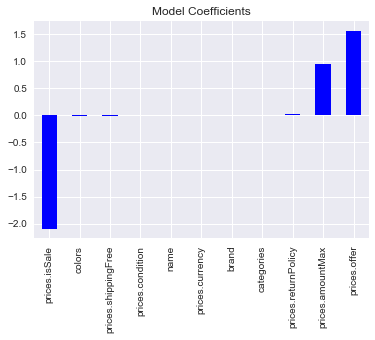

In [107]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [119]:
#prices.amountMax
#Define target and ID columns. Lets find prices.amountMax
target = 'prices.amountMax'
IDcol = ['id']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 28.6
CV Score : Mean - 16.7 | Std - 24.69 | Min - 2.059 | Max - 122.6


c:\python27\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


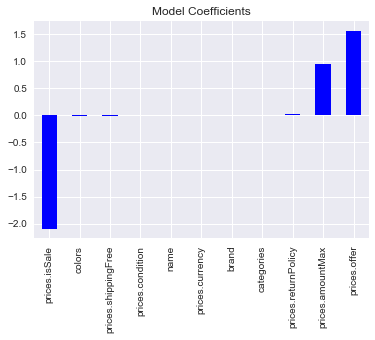

In [108]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Ridge Regression 


Model Report
RMSE : 29.75
CV Score : Mean - 20.79 | Std - 22.42 | Min - 4.522 | Max - 116


c:\python27\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


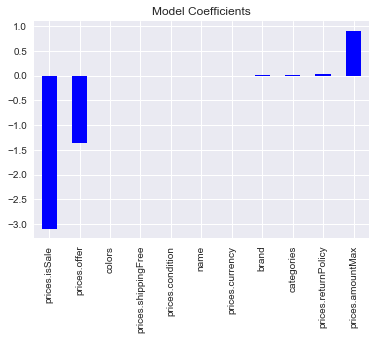

In [109]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## Decision Tree 

In [117]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)


Model Report
RMSE : 34.7
CV Score : Mean - 25.72 | Std - 31.01 | Min - 0.6763 | Max - 140


c:\python27\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## RandomForest

In [116]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)


Model Report
RMSE : 38.83
CV Score : Mean - 27.6 | Std - 29.46 | Min - 2.757 | Max - 145.4


c:\python27\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Linear Regression performs the best.

This is not the best model since, a lot of feature engineering can be done to further get a better score <br>
On account of time constraints, I'm not going to stop this here and work on the feature engineering part. <br>
It is a exciting dataset and needs a lot of cleaning. There are JSON data available which can be extremely useful. <br>
For now, this should get you started.

https://github.com/warmachine0609